## 金融数据处理

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn
import tushare as ts
%matplotlib inline
import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；

### 1. 高效获得金融数据

In [2]:
data = ts.get_k_data(['600030','300149'],  start = '2016-01-01', end = '2017-07-01')     #无法像yahoo一样同时调取多只股票；

In [3]:
data.head()

""


**1.1 获取单个对象数据**

In [2]:
#获得中信证券的股价信息
zxzq = ts.get_k_data('600030', start = '2016-01-01', end = '2017-07-01')
zxzq.head()

,date,open,close,high,low,volume,code
0,2016-01-04,18.356,16.634,18.356,16.577,1960583.0,600030
1,2016-01-05,15.987,16.795,17.110,15.825,2333291.0,600030
2,2016-01-06,16.700,17.062,17.271,16.367,1972783.0,600030
3,2016-01-07,16.634,15.549,16.748,15.416,679037.0,600030
4,2016-01-08,16.025,16.015,16.596,15.225,2979253.0,600030


In [3]:
# 获得指数数据
hs300 = ts.get_k_data('hs300',start = '2016-01-01', end = '2017-07-01')
hs300.set_index('date', inplace = True)
hs300.index = pd.to_datetime(hs300.index)
hs300.head()

,open,close,high,low,volume,code
date,,,,,,
2016-01-04,3725.86,3470.41,3726.25,3469.01,115370674.0,hs300
2016-01-05,3382.18,3478.78,3518.22,3377.28,162116984.0,hs300
2016-01-06,3482.41,3539.81,3543.74,3468.47,145966144.0,hs300
2016-01-07,3481.15,3294.38,3481.15,3284.74,44102641.0,hs300
2016-01-08,3371.87,3361.56,3418.85,3237.93,185959451.0,hs300


In [4]:
hs300.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 363 entries, 2016-01-04 to 2017-06-30
Data columns (total 6 columns):
open      363 non-null float64
close     363 non-null float64
high      363 non-null float64
low       363 non-null float64
volume    363 non-null float64
code      363 non-null object
dtypes: float64(5), object(1)
memory usage: 19.9+ KB


####  1.2 同时获取多只股价信息

In [5]:
# 编写函数同时获得多只股票的数据
def multiple_stocks(tickers):
    def data(ticker):
        stocks = ts.get_k_data(ticker,start = '2016-01-01', end = '2017-07-01')    #定义了stocks这个daraFrame；
        stocks.set_index('date',inplace = True)
        stocks.index = pd.to_datetime(stocks.index)      #要把日期时间parse成python支持的datetime格式，不然很多python层面的操作无法完成；
        return  stocks             #返回的是进行完处理的stcoks这个DataFrame；
        
    datas = map(data, tickers)
    
    return pd.concat(datas, keys=tickers, names=['Ticker', 'Date'])    #multiple_stocks函数返回的是拼接后的大DataFrame

In [6]:
# 获得以下三只股票数据
tickers = ['600030', '000001','600426']
all_stocks = multiple_stocks(tickers)
all_stocks.head()

open   close    high     low     volume    code
Ticker Date                                                         
600030 2016-01-04  18.356  16.634  18.356  16.577  1960583.0  600030
       2016-01-05  15.987  16.795  17.110  15.825  2333291.0  600030
       2016-01-06  16.700  17.062  17.271  16.367  1972783.0  600030
       2016-01-07  16.634  15.549  16.748  15.416   679037.0  600030
       2016-01-08  16.025  16.015  16.596  15.225  2979253.0  600030

#### 1.3 Muliple_stocks函数的背后思想 

In [7]:
stocks = ['600030', '002397', '000001']

stock_data0 = ts.get_k_data(stocks[0], start='2017-01-01', end='2017-01-15')
stock_data0.index = pd.to_datetime(stock_data0['date'])
del stock_data0['date']
stock_data0.head()

,open,close,high,low,volume,code
date,,,,,,
2017-01-03,15.752,15.860,15.899,15.713,623069.0,600030
2017-01-04,15.850,15.889,15.938,15.801,516717.0,600030
2017-01-05,15.909,15.821,15.928,15.791,478622.0,600030
2017-01-06,15.840,15.683,15.840,15.664,516640.0,600030
2017-01-09,15.683,15.742,15.791,15.644,398407.0,600030


In [8]:
stock_data1 = ts.get_k_data(stocks[1], start='2017-01-01', end='2017-01-15')
stock_data1.index = pd.to_datetime(stock_data1['date'])
del stock_data1['date']
stock_data1.head()

,open,close,high,low,volume,code
date,,,,,,
2017-01-03,8.020,8.098,8.128,8.020,24060.0,002397
2017-01-04,8.118,8.207,8.207,8.079,21333.0,002397
2017-01-05,8.207,8.690,8.857,8.138,157711.0,002397
2017-01-06,8.532,8.345,8.640,8.335,80911.0,002397
2017-01-09,8.266,8.345,8.384,8.266,44401.0,002397


In [9]:
stock_data2 = ts.get_k_data(stocks[2], start='2017-01-01', end='2017-01-15')
stock_data2.index = pd.to_datetime(stock_data2['date'])
del stock_data2['date']
stock_data2.head()

,open,close,high,low,volume,code
date,,,,,,
2017-01-03,8.977,9.026,9.046,8.957,459840.0,000001
2017-01-04,9.016,9.026,9.046,9.007,449329.0,000001
2017-01-05,9.036,9.036,9.046,9.016,344372.0,000001
2017-01-06,9.036,8.997,9.036,8.977,358154.0,000001
2017-01-09,8.997,9.016,9.036,8.977,361081.0,000001


In [10]:
pd.concat([stock_data0, stock_data1, stock_data2], keys=stocks, names=['code', 'date'])

open   close    high     low    volume    code
code   date                                                        
600030 2017-01-03  15.752  15.860  15.899  15.713  623069.0  600030
       2017-01-04  15.850  15.889  15.938  15.801  516717.0  600030
       2017-01-05  15.909  15.821  15.928  15.791  478622.0  600030
       2017-01-06  15.840  15.683  15.840  15.664  516640.0  600030
       2017-01-09  15.683  15.742  15.791  15.644  398407.0  600030
       2017-01-10  15.703  15.781  15.879  15.693  454018.0  600030
       2017-01-11  15.811  15.772  15.909  15.772  398776.0  600030
       2017-01-12  15.781  15.821  15.948  15.762  559594.0  600030
       2017-01-13  15.811  15.879  16.017  15.693  825208.0  600030
002397 2017-01-03   8.020   8.098   8.128   8.020   24060.0  002397
       2017-01-04   8.118   8.207   8.207   8.079   21333.0  002397
       2017-01-05   8.207   8.690   8.857   8.138  157711.0  002397
       2017-01-06   8.532   8.345   8.640   8.335   80911.0  002397
       2017-01-09   8.266   8.345   8.384   8.266   44401.0  002397
       2017-01-10   8.345   8.286   8.404   8.276   29406.0  002397
       2017-01-11   8.286   8.197   8.286   8.177   26046.0  002397
       2017-01-12   8.226   8.049   8.236   8.039   29279.0  002397
       2017-01-13   8.049   8.010   8.098   7.990   18457.0  002397
000001 2017-01-03   8.977   9.026   9.046   8.957  459840.0  000001
       2017-01-04   9.016   9.026   9.046   9.007  449329.0  000001
       2017-01-05   9.036   9.036   9.046   9.016  344372.0  000001
       2017-01-06   9.036   8.997   9.036   8.977  358154.0  000001
       2017-01-09   8.997   9.016   9.036   8.977  361081.0  000001
       2017-01-10   9.016   9.016   9.026   9.007  241053.0  000001
       2017-01-11   9.007   9.007   9.036   8.997  303430.0  000001
       2017-01-12   8.997   9.016   9.036   8.997  428006.0  000001
       2017-01-13   9.007   9.026   9.056   8.987  434301.0  000001

### 2. 金融数据可视化

In [11]:
close_price = all_stocks[['close']].reset_index()      #重置索引，让索引重新回到默认的0开始；
close_price.head()

,Ticker,Date,close
0,600030,2016-01-04,16.634
1,600030,2016-01-05,16.795
2,600030,2016-01-06,17.062
3,600030,2016-01-07,15.549
4,600030,2016-01-08,16.015


In [12]:
# 把所有的股价信息显示在一张表格里；数据透视表；
daily_close = close_price.pivot(index = 'Date', 
                                columns = 'Ticker', 
                                values= 'close')
daily_close.head()

Ticker,000001,600030,600426
Date,,,
2016-01-04,9.141,16.634,7.572
2016-01-05,9.222,16.795,7.607
2016-01-06,9.327,17.062,7.858
2016-01-07,8.850,15.549,7.100
2016-01-08,8.995,16.015,7.304


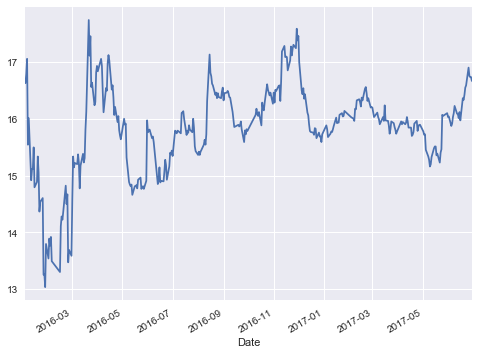

In [13]:
# plot 中信证券
daily_close['600030'].plot(figsize=(8,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F559779940>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F559D02D30>], dtype=object)

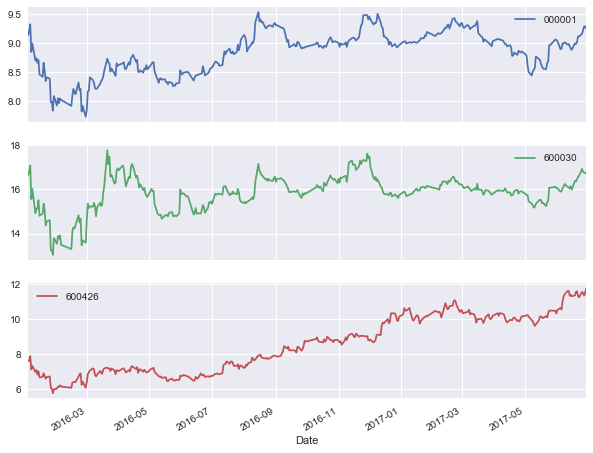

In [14]:
# plot 三只股票的股价信息
daily_close.plot(subplots= True, figsize=(10, 8))

### 3. 金融计算

#### 3.1 计算每日收益

In [15]:
# 用shift方法；
price_change = daily_close / daily_close.shift(1) - 1
daily_close['yes_day'] = daily_close['000001'].shift(1)
price_change.ix[:,0:4].head()

Ticker,000001,600030,600426
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,0.008861,0.009679,0.004622
2016-01-06,0.011386,0.015898,0.032996
2016-01-07,-0.051142,-0.088677,-0.096462
2016-01-08,0.016384,0.029970,0.028732


In [16]:
del daily_close['yes_day'] 

In [17]:
#  用.pct_change() 方法
price_change2 = daily_close.pct_change()
price_change2.ix[:,0:2].head()

Ticker,000001,600030
Date,,
2016-01-04,NaN,NaN
2016-01-05,0.008861,0.009679
2016-01-06,0.011386,0.015898
2016-01-07,-0.051142,-0.088677
2016-01-08,0.016384,0.029970


In [18]:
# 将NaN值替换为0
price_change2.fillna(0, inplace=True)
price_change2.ix[:5,:]

Ticker,000001,600030,600426
Date,,,
2016-01-04,0.000000,0.000000,0.000000
2016-01-05,0.008861,0.009679,0.004622
2016-01-06,0.011386,0.015898,0.032996
2016-01-07,-0.051142,-0.088677,-0.096462
2016-01-08,0.016384,0.029970,0.028732


#### 3.2 计算累积收益

In [19]:
cum_daily_return = (1 + price_change2).cumprod()
cum_daily_return.head()

Ticker,000001,600030,600426
Date,,,
2016-01-04,1.000000,1.000000,1.000000
2016-01-05,1.008861,1.009679,1.004622
2016-01-06,1.020348,1.025730,1.037771
2016-01-07,0.968165,0.934772,0.937665
2016-01-08,0.984028,0.962787,0.964606


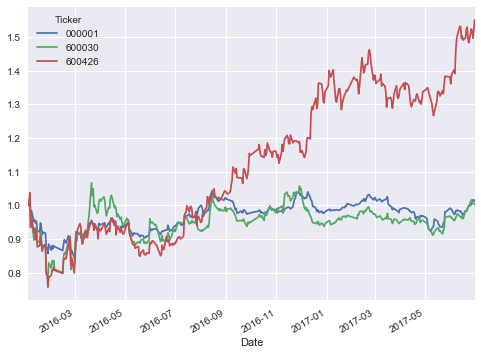

In [20]:
cum_daily_return.plot(figsize=(8,6))

### 4. 分析return分布

#### 4.1 直方图

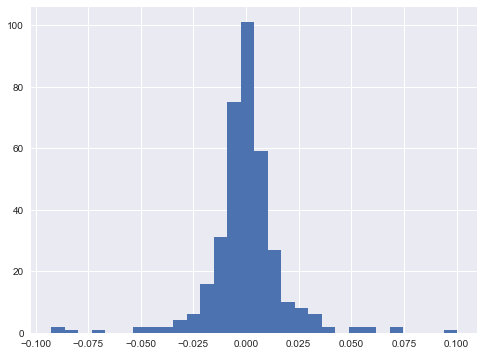

In [25]:
# 绘制频数分布直方图，分析中信证券的return分布；
zxzq = price_change['600030']
zxzq.hist(bins=30, figsize=(8,6));

In [27]:
zxzq.describe(percentiles=[0.025, 0.5, 0.975])

count    362.000000
mean       0.000169
std        0.018050
min       -0.092490
2.5%      -0.035270
50%        0.000000
97.5%      0.032897
max        0.100316
Name: 600030, dtype: float64

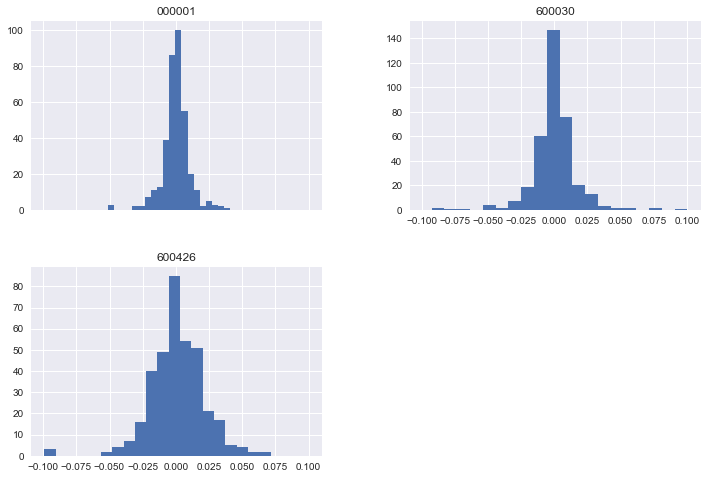

In [30]:
# 画出所有股票的股价分布：
_ = price_change.hist(bins=20, sharex=True, figsize=(12,8));

#### 4.2 QQ-Plots

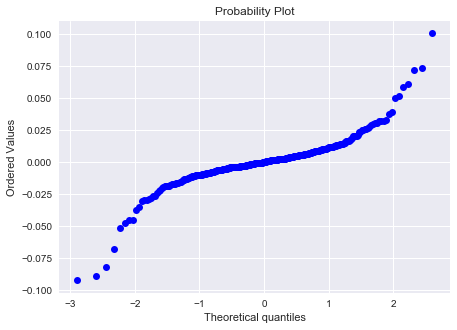

In [31]:
# 使用QQ图来验证股价retun分布；
import scipy.stats as stats
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
stats.probplot(zxzq, dist='norm', plot=ax)   #stats.probplot()用来绘制QQ图；
plt.show()

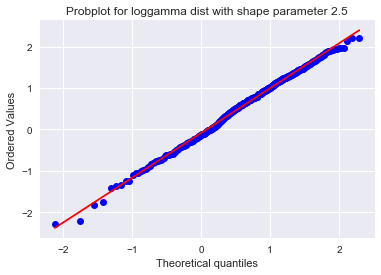

In [32]:
>>> fig = plt.figure()
>>> ax = fig.add_subplot(111)
>>> x = stats.loggamma.rvs(c=2.5, size=500)
>>> stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)
>>> ax.set_title("Probplot for loggamma dist with shape parameter 2.5")
>>> plt.show()

### 5. 股价相关性

In [33]:
# 计算沪深300指数收益
hs300_return = hs300['close'].pct_change().fillna(0)
hs300_return.head()

date
2016-01-04    0.000000
2016-01-05    0.002412
2016-01-06    0.017544
2016-01-07   -0.069334
2016-01-08    0.020392
Name: close, dtype: float64

In [34]:
price_change2.head()

Ticker,000001,600030,600426
Date,,,
2016-01-04,0.000000,0.000000,0.000000
2016-01-05,0.008861,0.009679,0.004622
2016-01-06,0.011386,0.015898,0.032996
2016-01-07,-0.051142,-0.088677,-0.096462
2016-01-08,0.016384,0.029970,0.028732


In [36]:
# 把沪深300的收益拼接到前面得到的大表中
return_all = pd.concat([hs300_return, price_change2], axis=1)
return_all.rename(columns={'close': 'hs300'}, inplace=True)
return_all.head()

,hs300,000001,600030,600426
2016-01-04,0.000000,0.000000,0.000000,0.000000
2016-01-05,0.002412,0.008861,0.009679,0.004622
2016-01-06,0.017544,0.011386,0.015898,0.032996
2016-01-07,-0.069334,-0.051142,-0.088677,-0.096462
2016-01-08,0.020392,0.016384,0.029970,0.028732


In [37]:
# 计算累积收益
cumreturn_all = (1 + return_all).cumprod()
cumreturn_all.head()

,hs300,000001,600030,600426
2016-01-04,1.000000,1.000000,1.000000,1.000000
2016-01-05,1.002412,1.008861,1.009679,1.004622
2016-01-06,1.019998,1.020348,1.025730,1.037771
2016-01-07,0.949277,0.968165,0.934772,0.937665
2016-01-08,0.968635,0.984028,0.962787,0.964606


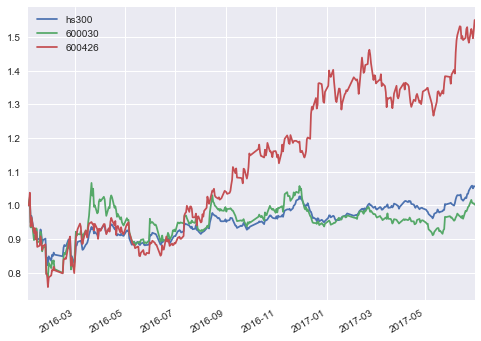

In [38]:
# 累积收益作图
cumreturn_all[['hs300', '600030', '600426']].plot(figsize=(8,6));

In [39]:
# 计算相关性
corrs = return_all.corr()
corrs

,hs300,000001,600030,600426
hs300,1.000000,0.863691,0.879145,0.729017
000001,0.863691,1.000000,0.780365,0.611967
600030,0.879145,0.780365,1.000000,0.619960
600426,0.729017,0.611967,0.619960,1.000000


In [42]:
corrs.ix['hs300']

hs300     1.000000
000001    0.863691
600030    0.879145
600426    0.729017
Name: hs300, dtype: float64

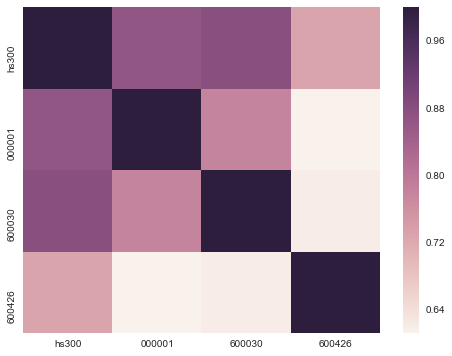

In [45]:
import seaborn
fig = plt.figure(figsize=(8,6))
seaborn.heatmap(corrs)

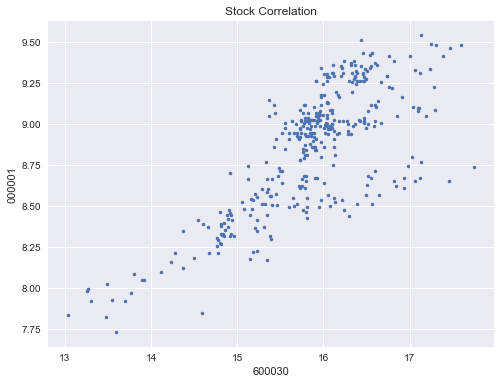

In [49]:
plt.figure(figsize =(8,6))
plt.title('Stock Correlation')
plt.plot(daily_close['600030'], daily_close['000001'], '.')
plt.xlabel('600030')
plt.ylabel('000001')